## Creating interactive plots

### Motivation

Two recent developments:  first, I wanted to experiment with making interactive visualizations in Jupyter Notebook and, second, I'm at the age where all of my friends are having children. We've been joking about the imminent changes to their sleep patterns, and I'm sure they would appreciate being able to see those changes quantified. Why not use this as the basis of an interactive graphic?

#### Set HTML styling for widget labels

This should be easier with the next major version of ipywidgets.

In [1]:
%%html
<style>
.widget-label, .widget-hbox {
    min-width: 250px !important;
}
</style>

#### Configure plot and widget parameters

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot parameters
plt.rcParams.update({'font.size': 14})

# Configure parameters for widgets more generally
_WIDGET_KWARGS = {'width': '200px', 'height': '50px'}
_BOX_KWARGS = {'border_width': '50px 0px 50px 0px', 'border_color': 'white'}

# Configure parameters for widgets for days
_DAYS_MIN = 30
_DAYS_MAX = 720
_DAYS_STEP = 30
_DAYS_DEFAULT = 210
_DAYS_KWARGS = {'min': _DAYS_MIN, 'max': _DAYS_MAX, 'step': _DAYS_STEP, 'value': _DAYS_DEFAULT}
_DAYS_KWARGS.update(_WIDGET_KWARGS)

# Configure parameters for widgets for hours
_HOURS_MIN = 0
_HOURS_MAX = 10
_HOURS_STEP = .5
_HOURS_DEFAULT_CHILDLESS = 8
_HOURS_DEFAULT_PARENT = 4
_HOURS_KWARGS = {'min': _HOURS_MIN, 'max': _HOURS_MAX, 'step': _HOURS_STEP}
_HOURS_KWARGS.update(_WIDGET_KWARGS)

#### Create callback function to create plot

In [3]:
import numpy as np

_PLOT_KWARGS = {'color': (0, 0, 0), 'linewidth': 4}


def plot_sleep_deficit(days_total, hours_parent, hours_childless):
    """
    Plots sleep deficits (or gains, but who are you kidding?) by calculating
    sleep lost until child sleeps through the night.
    """
    # Create figure and format axes to remove unnecessary framing
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Plot sleep trends
    days = np.arange(0, days_total, 1)
    plt.plot(days, days*hours_childless, label='Childless', linestyle='-', **_PLOT_KWARGS)
    plt.plot(days, days*hours_parent, label='Parent', linestyle='--', **_PLOT_KWARGS)
    
    # Shade sleep deficit or gain
    corners = [[0, 0], [days_total, days_total*hours_childless], 
               [days_total, days_total*hours_parent]]
    color = (1, 0, 0, .1)
    if hours_childless < hours_parent:
        color = (0, 0, 1, .1)
    ax.add_patch(plt.Polygon(corners, color=color))
    
    # Set title and labels
    plt.title('Sleep deficit for new parents')
    plt.xlabel('Days since birth')
    plt.ylabel('Hours of sleep')
    
    # Set axis limits
    plt.xlim(0, days_total)
    height = days_total*_HOURS_MAX
    plt.ylim(-.05*height, height)
    
    # Set helper text
    difference = days_total * abs(hours_childless - hours_parent)
    verb = 'lost:  '
    if hours_childless < hours_parent:
        verb = ' gained:  '
    text = 'Total hours ' + verb + str(int(difference)) + \
        '\nTotal days ' + verb + str(int(difference / 24))
    plt.text(.025*days_total, .6*height, text, fontsize=12)
    # Set legend
    plt.legend(loc='center left', fontsize=12, frameon=False)
    plt.show()

#### Create interactive widgets and plot

In [4]:
from ipywidgets import widgets
from IPython.display import display

# Create sliders
slider_days = widgets.IntSlider(
    description='Days until sleeping independently', **_DAYS_KWARGS)
slider_childless = widgets.IntSlider(
    description='Hours of sleep per night before birth', value=_HOURS_DEFAULT_CHILDLESS, **_HOURS_KWARGS)
slider_parent = widgets.IntSlider(
    description='Hours of sleep per night after birth', value=_HOURS_DEFAULT_PARENT, **_HOURS_KWARGS)

# Create container
interactive = widgets.interaction.interactive(
    plot_sleep_deficit, days_total=slider_days,
    hours_childless=slider_childless, hours_parent=slider_parent)

# Style container
for trait, value in _BOX_KWARGS.items():
    interactive.set_trait(trait, value)

#### Do it!

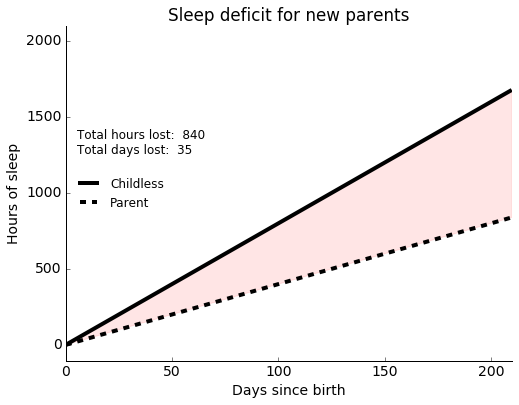

In [5]:
interactive